# VAE - Variational Auto Encoder
### Variational auto encoder Encoder maps X onto a latent space Z Decoder samples Z from N(0,1) VAE_loss = Reconstruction_loss + KL_loss
Source: https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.vae

### Arguments that work with VAE algorithm:
1. encoder_neurons
2. oder_neurons
3. ent_dim
4. den_activation
5. output_activation
6. loss
7. optimizer
8. epochs
9. batch_size
10. dropout_rate
11. l2_regularizer
12. validation_size
13. preprocessing
14. verbose
15. random_state
16. contamination
17. gamma
18. capacity

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
import time
sys.path.insert(0,'../../../..')
import omama as O

Populating the interactive namespace from numpy and matplotlib


In [2]:
imgs = O.DataHelper.get2D(N = 100, config_num=5, randomize=True, timing=True)
downsampled_imgs = O.Normalize.downsample(imgs, output_shape=(64, 64), flatten=True, timing=True)

get2D                    ...took   125.990981 seconds
image downsampling       ...took     1.983315 seconds
image downsampling       ...took     5.152274 seconds
image downsampling       ...took     6.563697 seconds
image downsampling       ...took     9.697112 seconds
image downsampling       ...took    11.092023 seconds
image downsampling       ...took    14.267585 seconds
image downsampling       ...took    15.641705 seconds
image downsampling       ...took    18.800444 seconds
image downsampling       ...took    20.195204 seconds
image downsampling       ...took    24.657293 seconds
image downsampling       ...took    27.774682 seconds
image downsampling       ...took    30.943255 seconds
image downsampling       ...took    32.324581 seconds
image downsampling       ...took    33.746164 seconds
image downsampling       ...took    36.913551 seconds
image downsampling       ...took    40.059878 seconds
image downsampling       ...took    43.198037 seconds
image downsampling       ...

2022-08-25 14:31:35.273229: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-08-25 14:31:36.549371: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-08-25 14:31:36.779224: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b7:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2022-08-25 14:31:36.779268: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-08-25 14:31:36.782330: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-08-25 14:31:36.782369: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.1

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4096)]       0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 4096)         16781312    input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          524416      dense[0][0]                      
__________________________________________________________________________________________________
dropout (Dropout)               (None, 128)          0           dense_1[0][0]                    
______________________________________________________________________________________________

2022-08-25 14:31:36.790920: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-25 14:31:36.793769: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b7:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2022-08-25 14:31:36.799155: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2022-08-25 14:31:36.799187: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-08-25 14:31:37.257345: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecuto

Epoch 1/100


2022-08-25 14:31:38.874594: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11


1/3 [=========>....................] - ETA: 3s - loss: 5361.7451

2022-08-25 14:31:39.569147: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2022-08-25 14:31:39.569477: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


3/3 [==============================] - 2s 99ms/step - loss: 5103.2202 - val_loss: 5754.5347
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 4985.5342 - val_loss: 5749.4150
Epoch 3/100
3/3 [==============================] - 0s 13ms/step - loss: 5017.8027 - val_loss: 5720.6514
Epoch 4/100
3/3 [==============================] - 0s 13ms/step - loss: 4979.5337 - val_loss: 5668.6699
Epoch 5/100
3/3 [==============================] - 0s 13ms/step - loss: 4881.2788 - val_loss: 5584.1616
Epoch 6/100
3/3 [==============================] - 0s 13ms/step - loss: 4695.1133 - val_loss: 5509.5049
Epoch 7/100
3/3 [==============================] - 0s 13ms/step - loss: 9296.2031 - val_loss: 5441.0342
Epoch 8/100
3/3 [==============================] - 0s 20ms/step - loss: 4578.4819 - val_loss: 5391.4238
Epoch 9/100
3/3 [==============================] - 0s 17ms/step - loss: 4566.5977 - val_loss: 5330.5190
Epoch 10/100
3/3 [==============================] - 0s 13ms/step - loss: 442

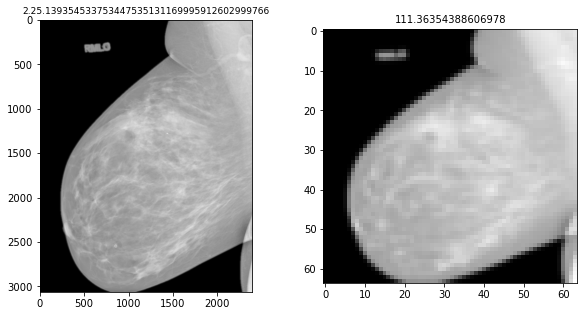

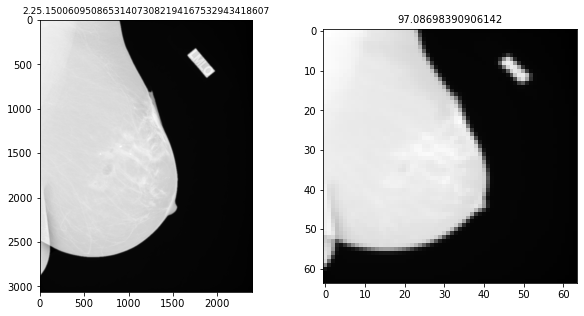

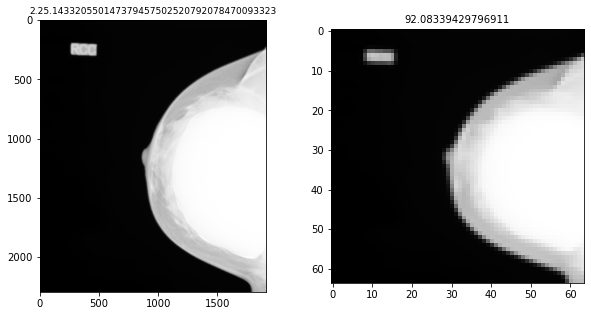

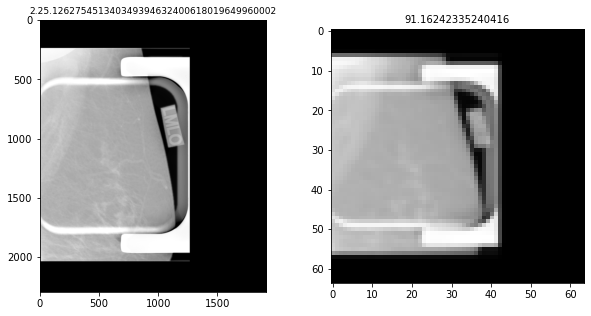

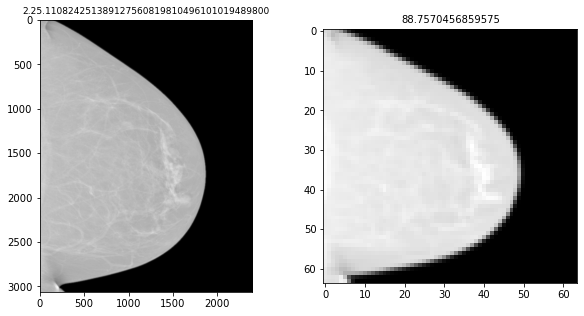

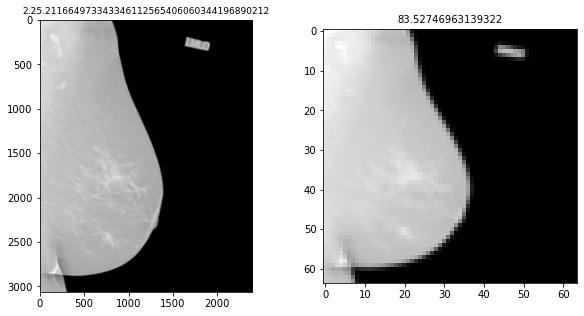

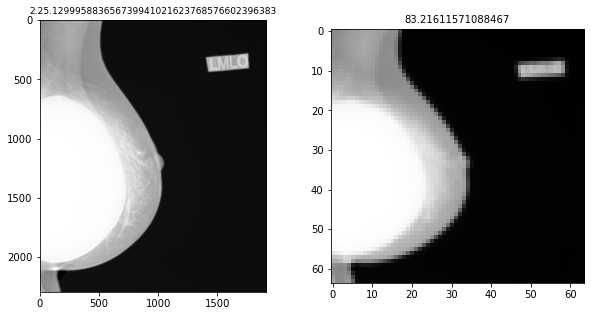

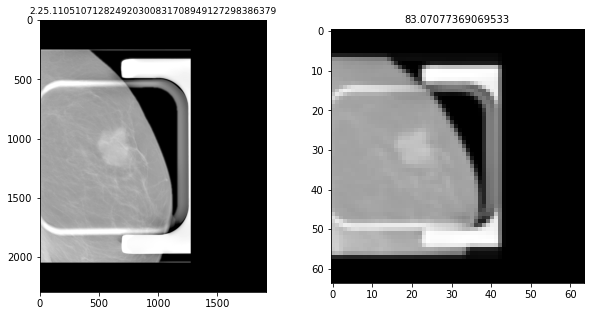

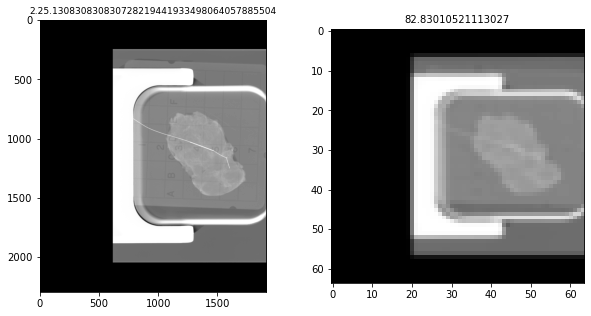

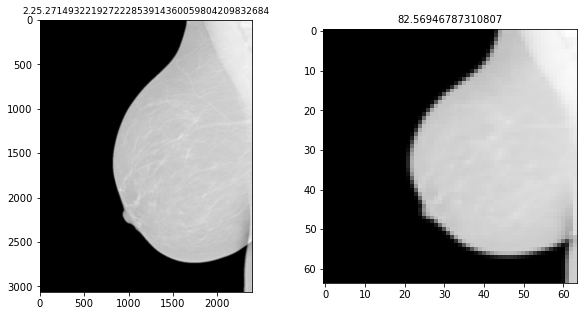

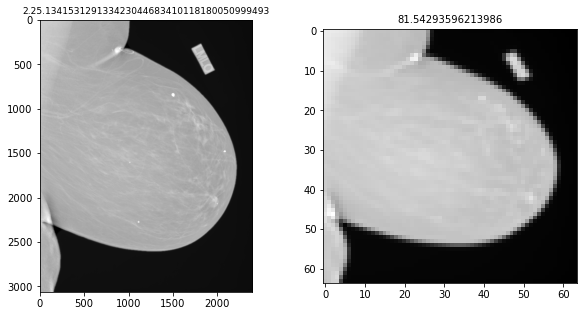

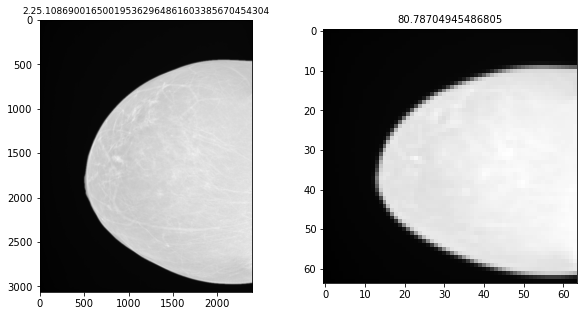

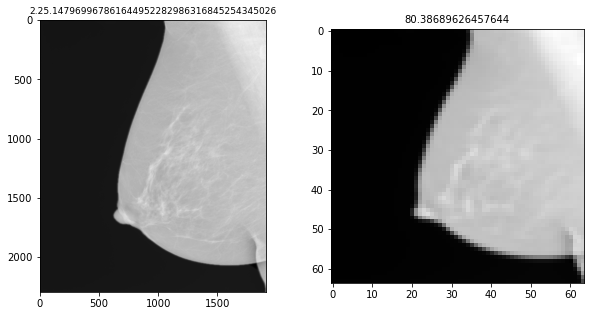

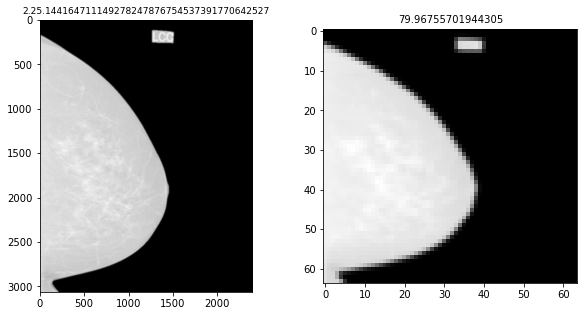

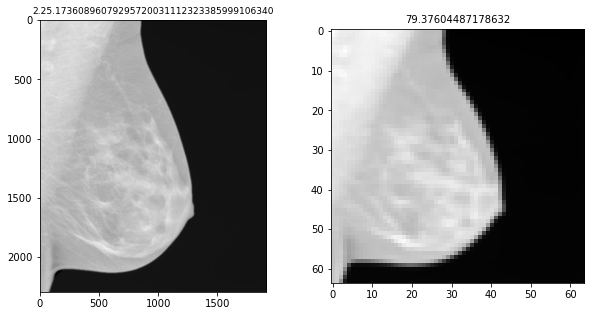

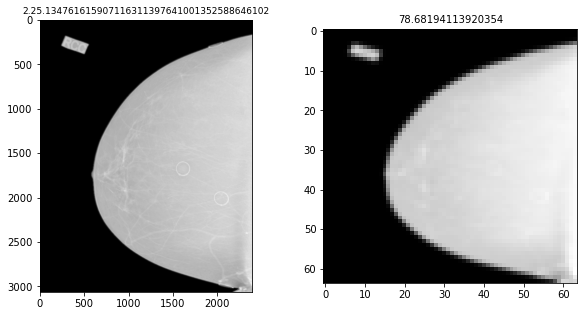

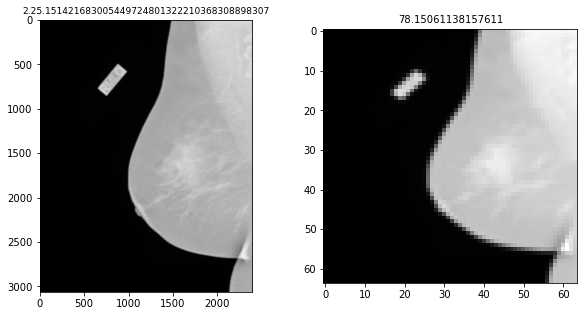

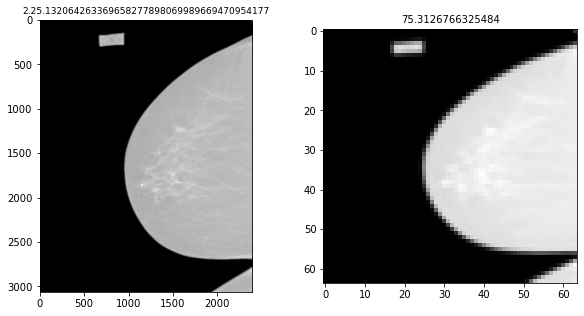

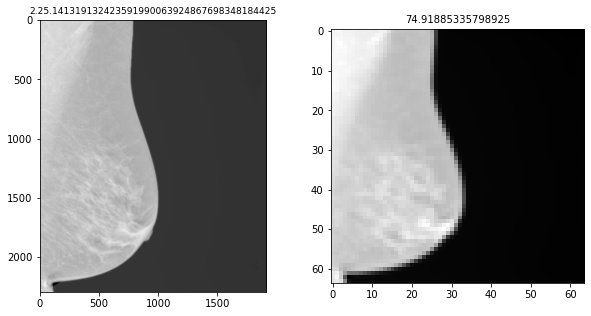

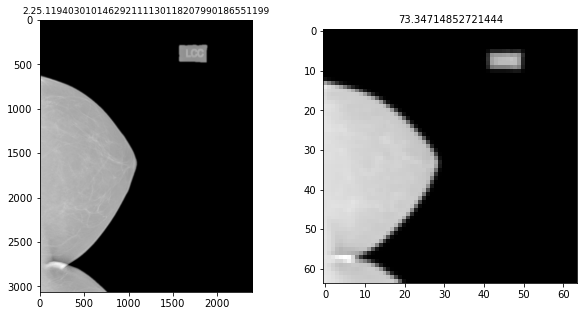

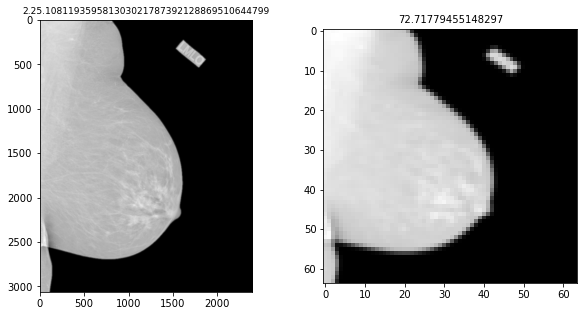

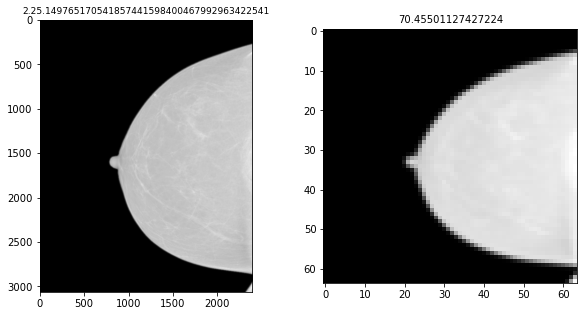

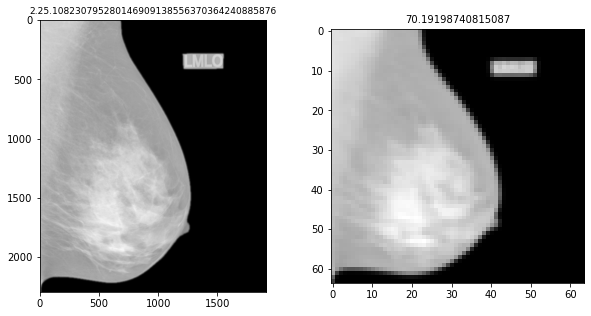

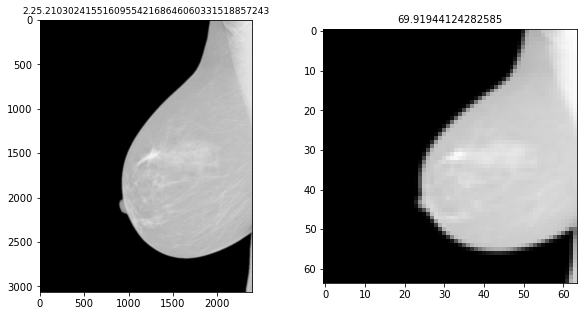

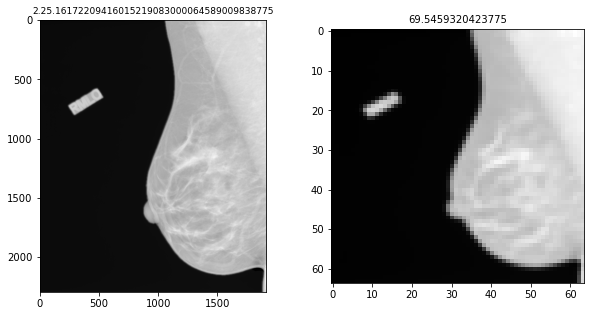

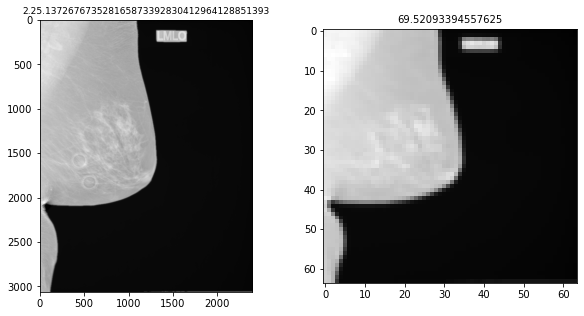

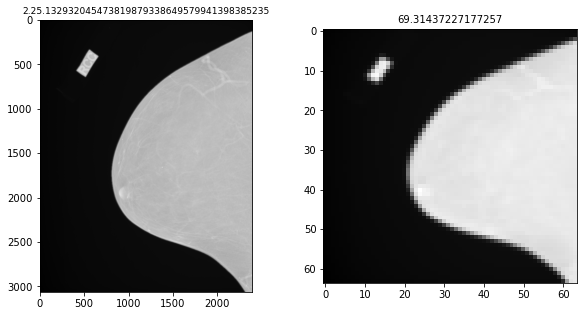

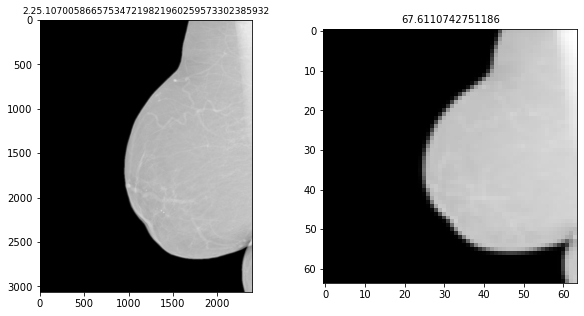

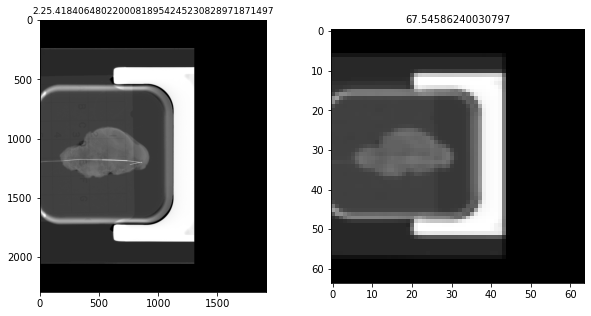

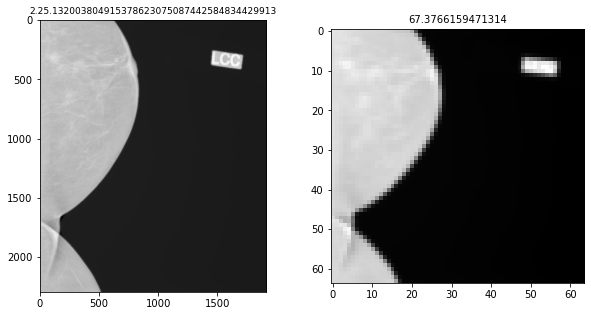

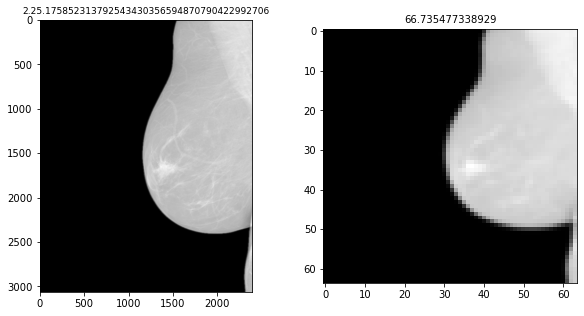

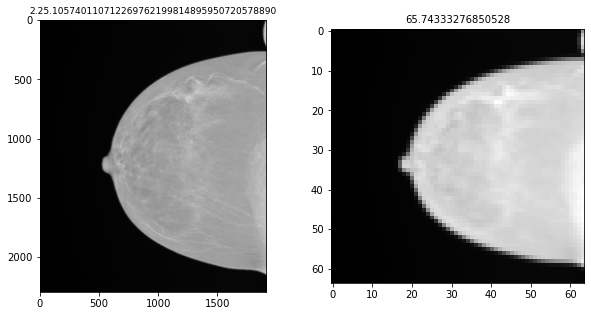

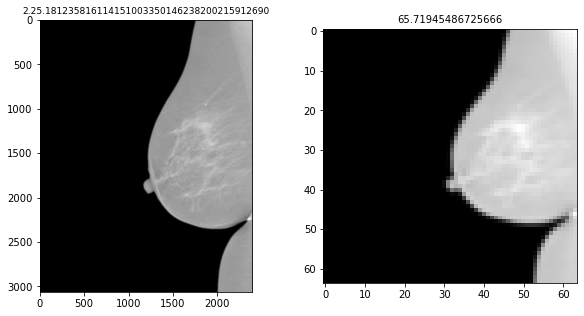

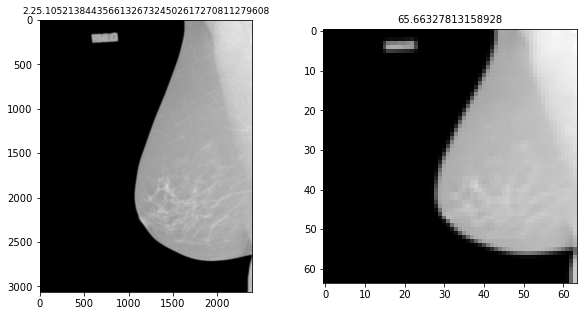

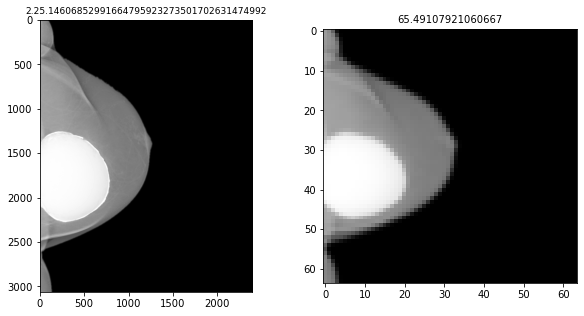

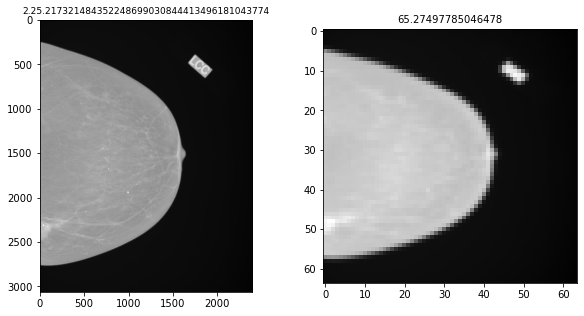

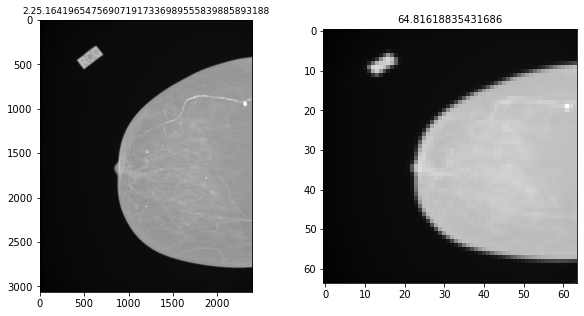

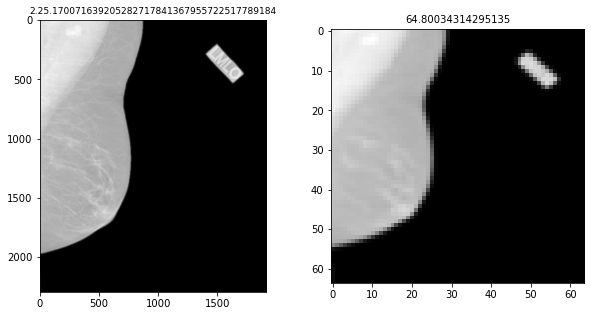

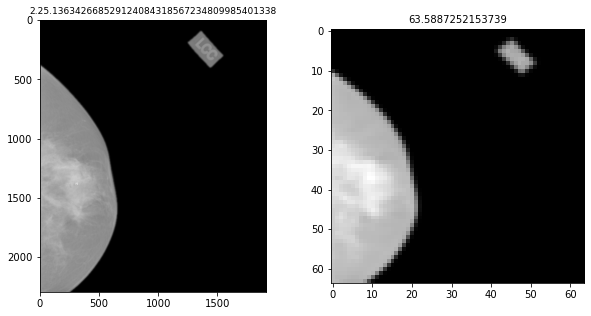

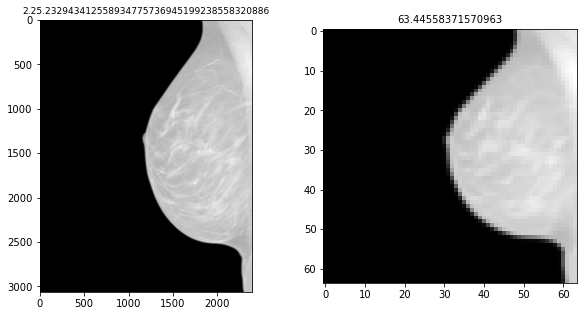

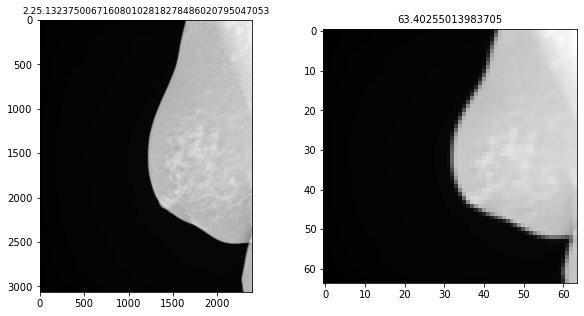

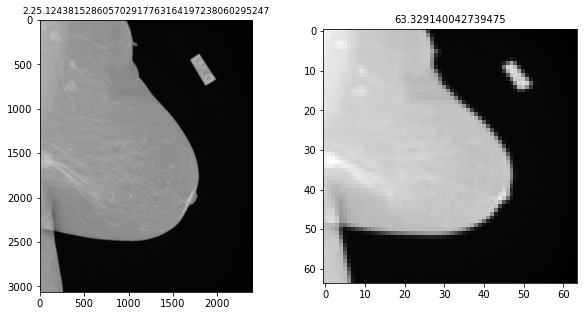

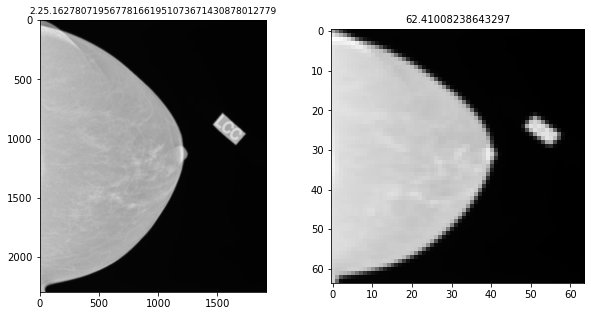

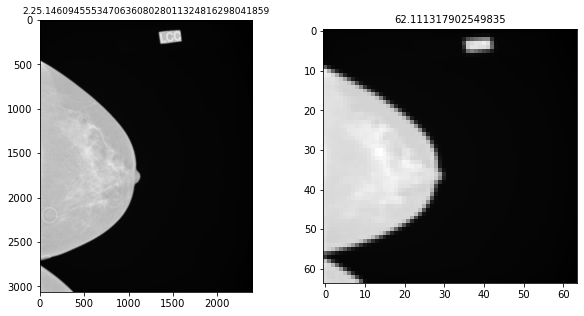

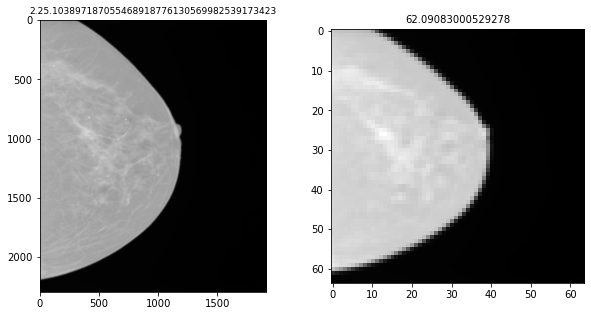

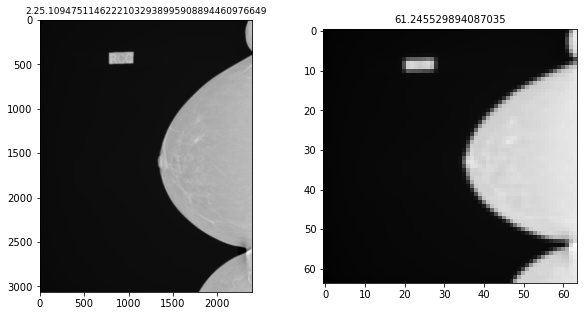

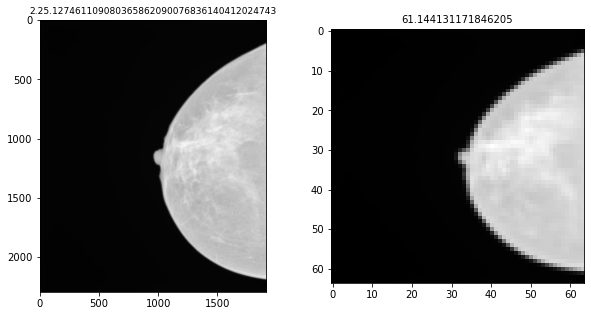

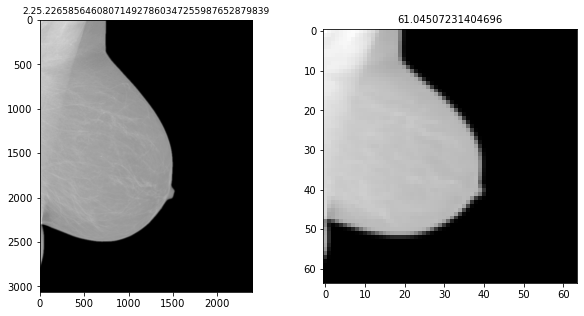

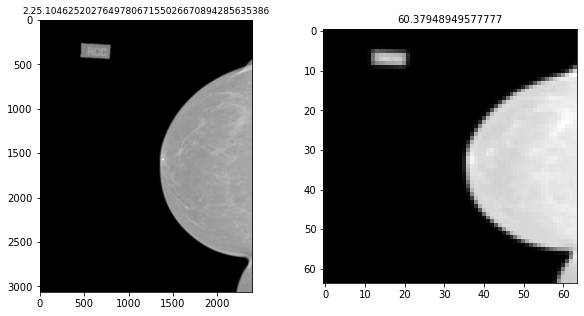

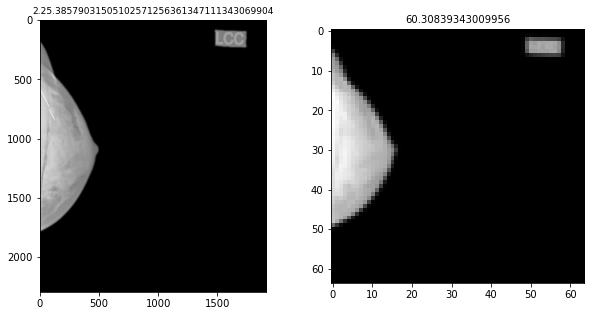

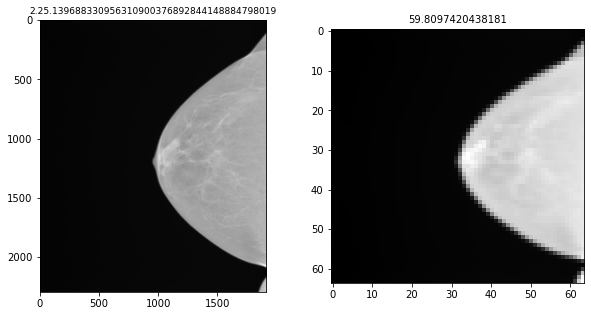

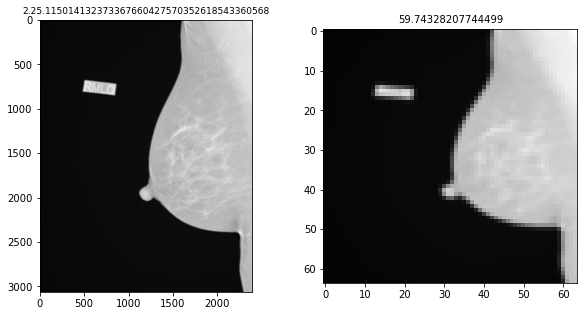

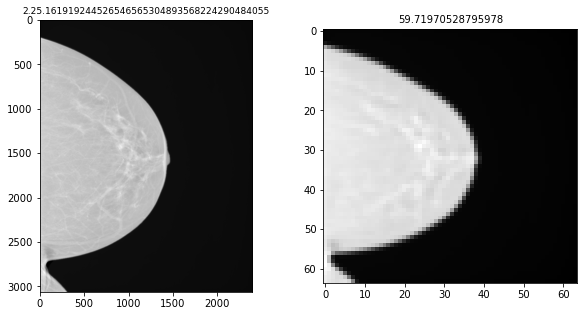

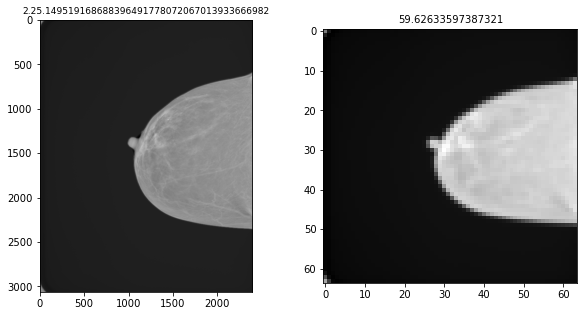

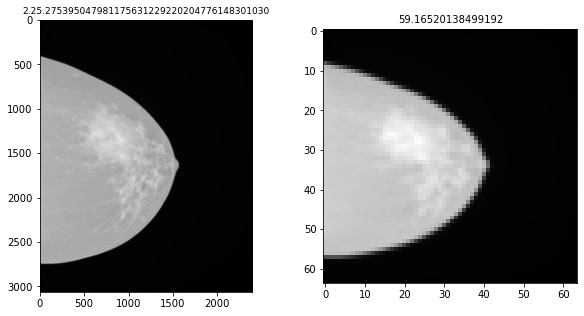

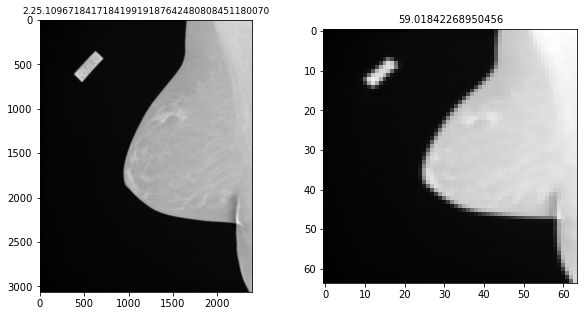

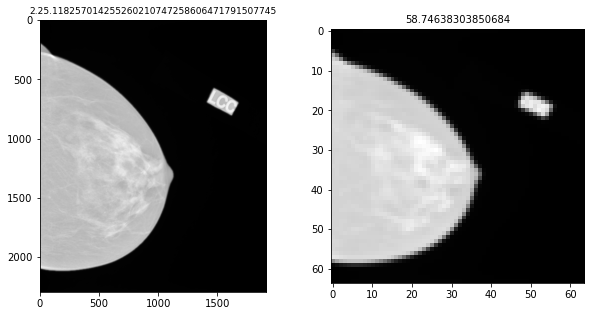

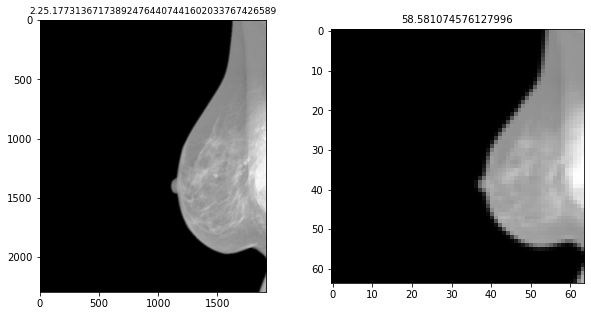

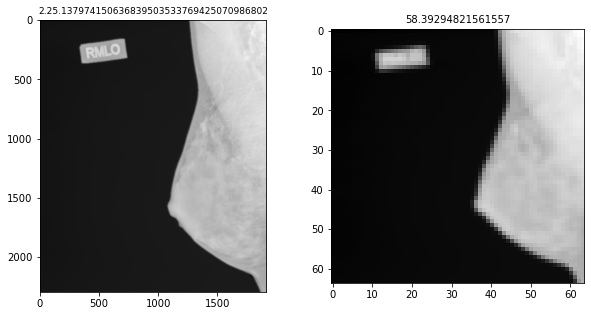

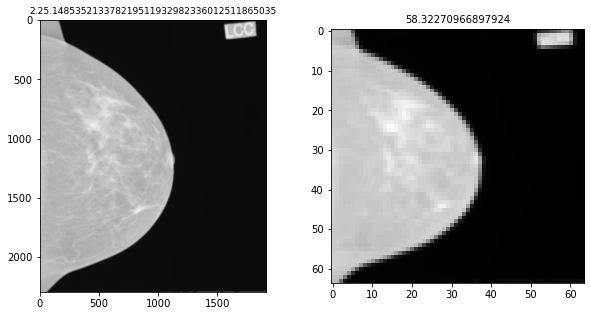

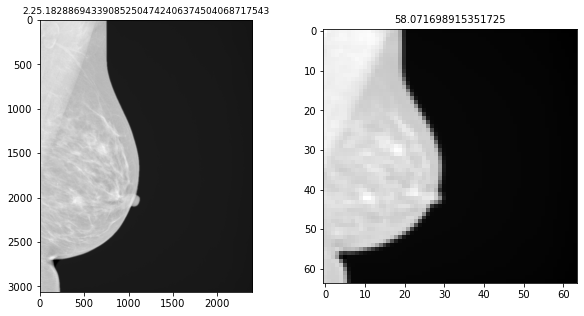

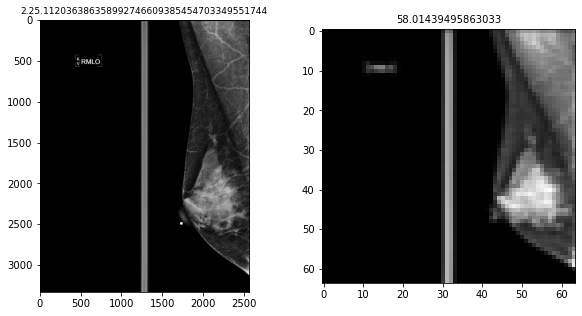

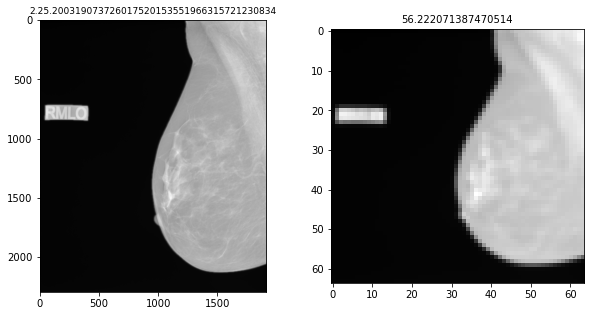

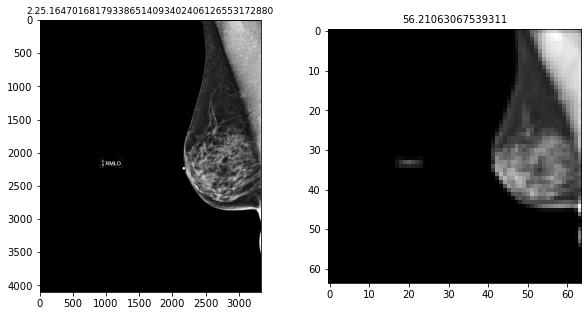

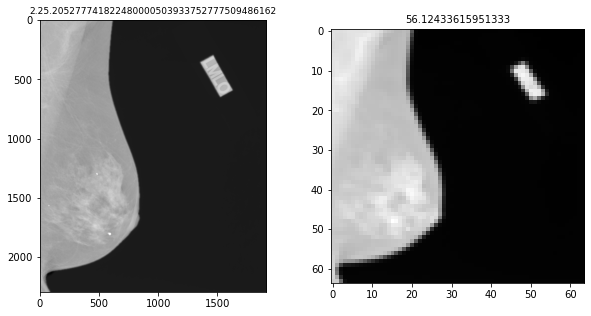

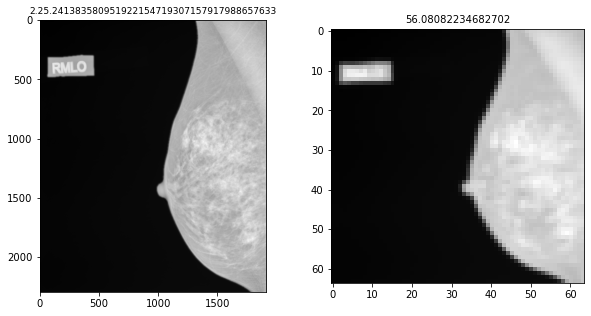

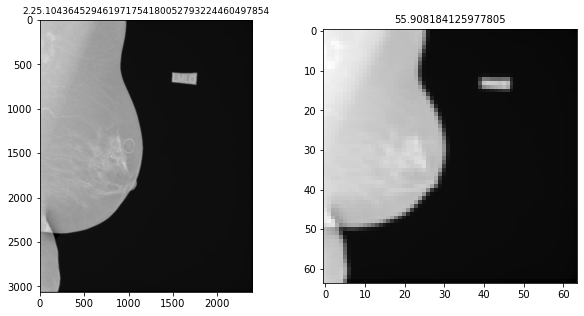

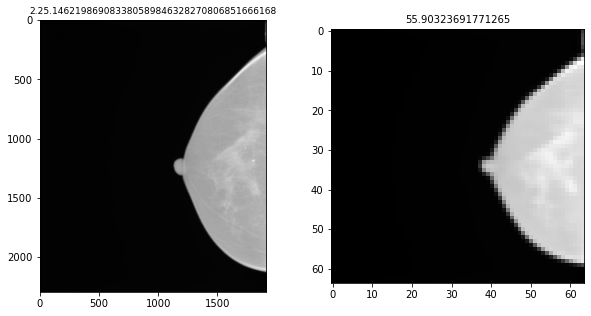

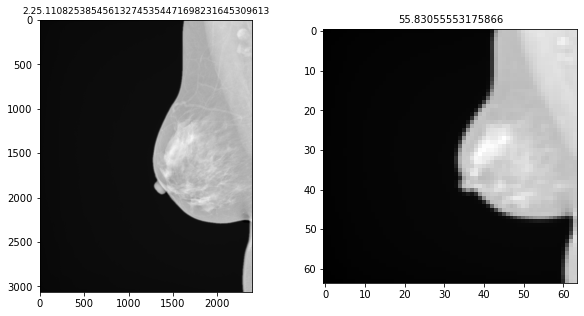

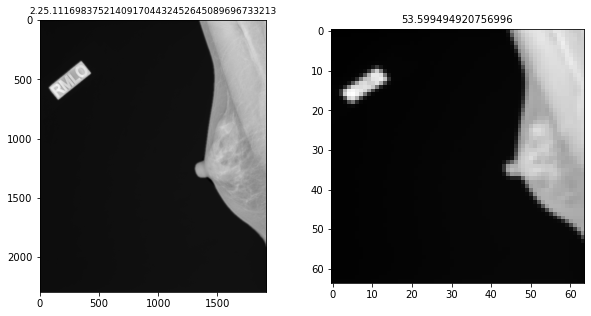

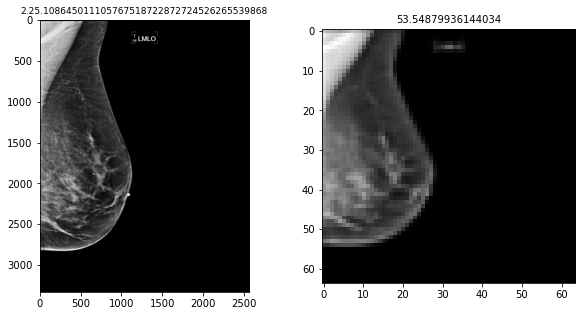

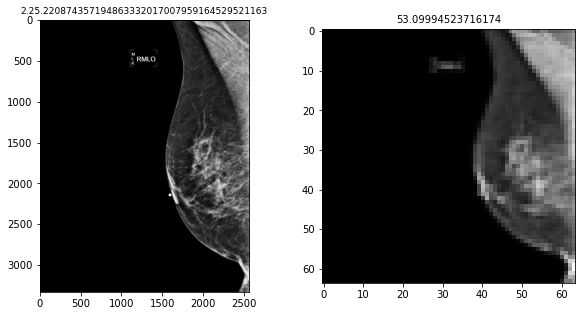

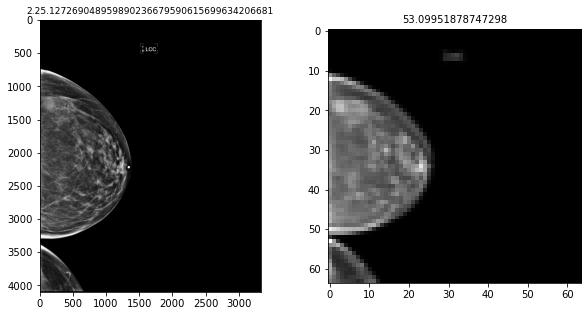

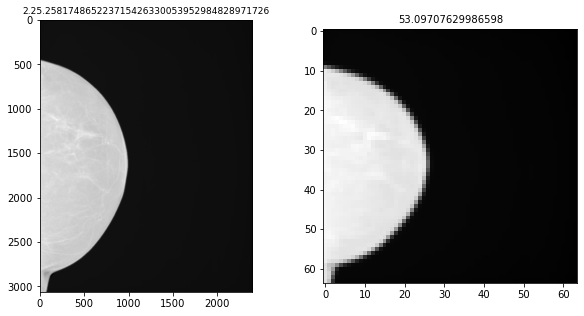

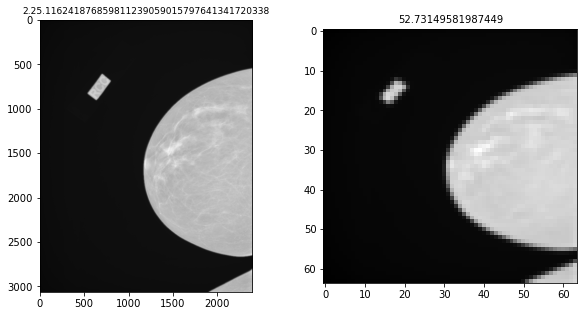

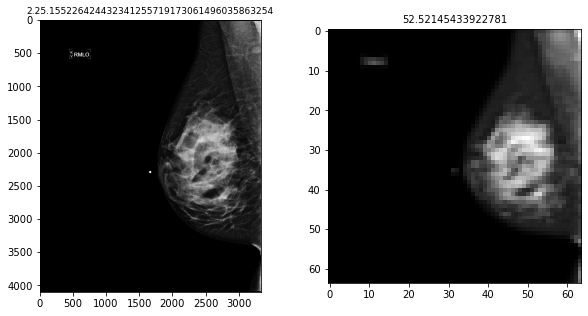

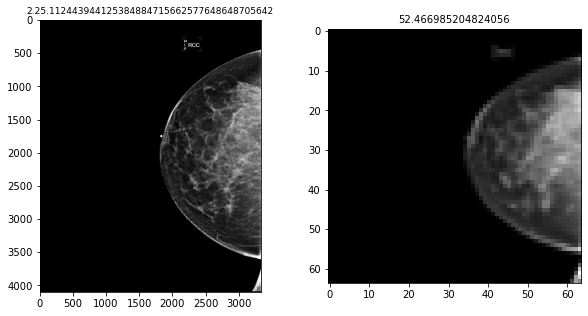

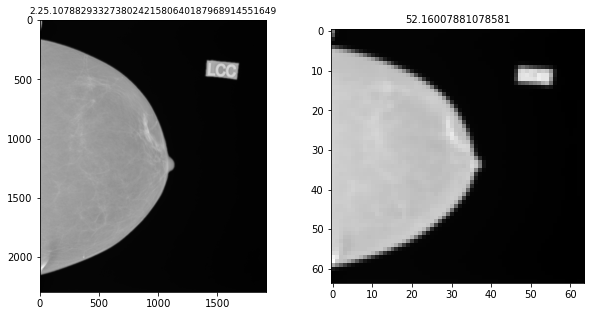

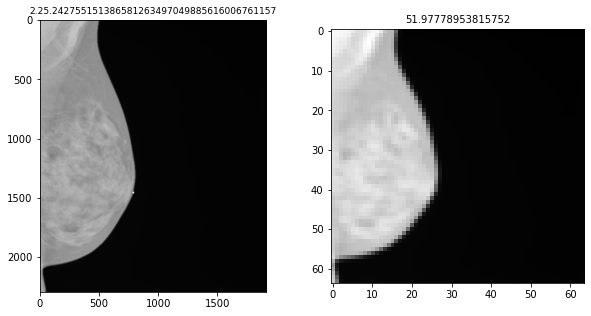

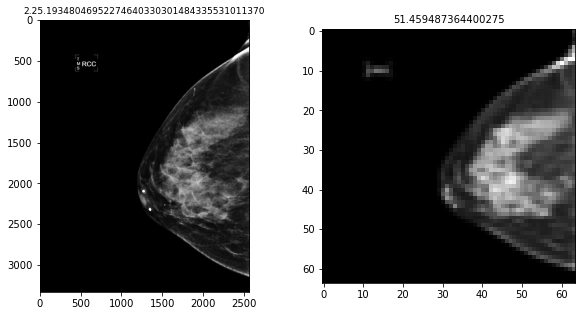

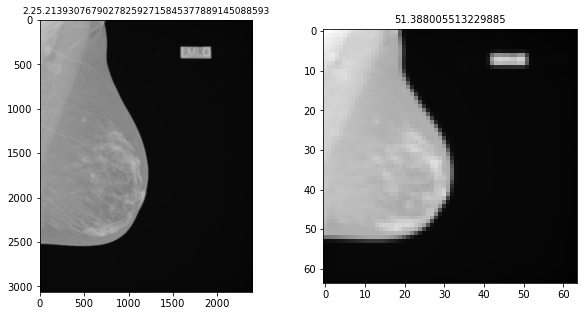

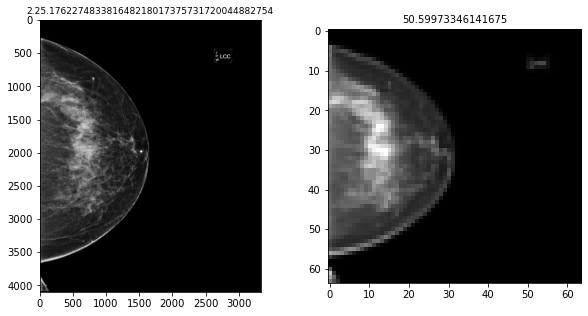

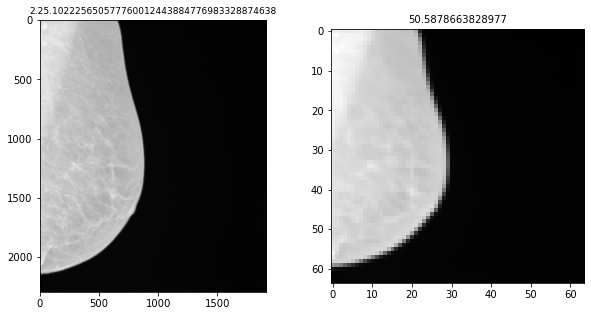

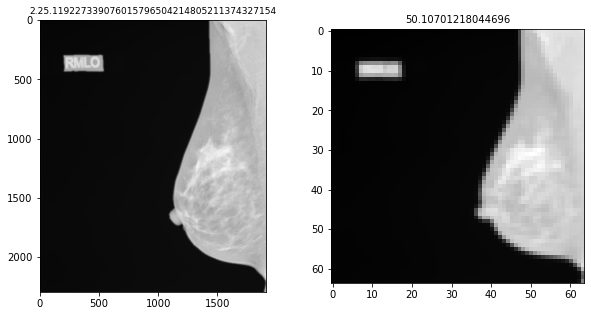

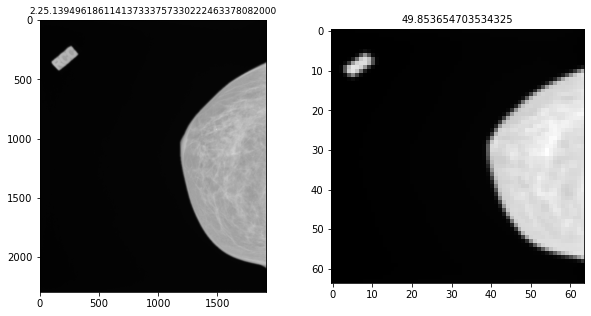

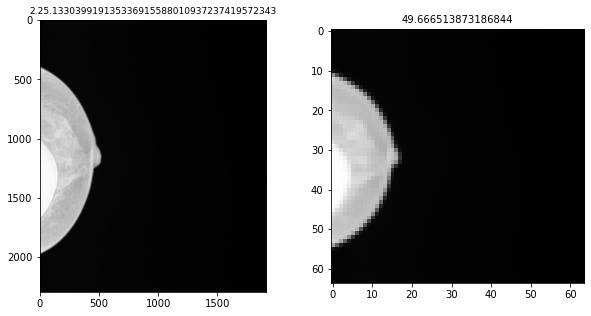

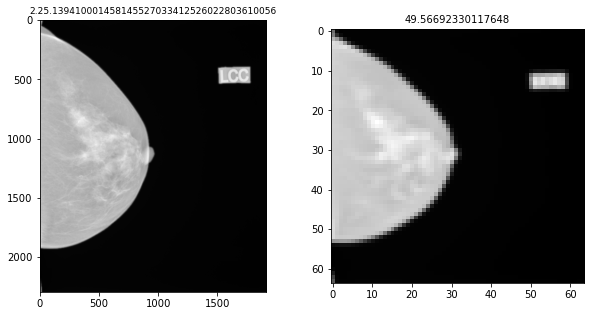

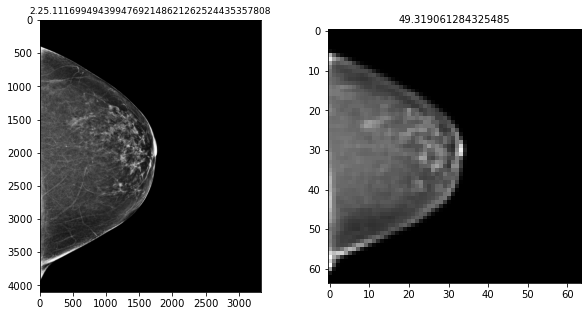

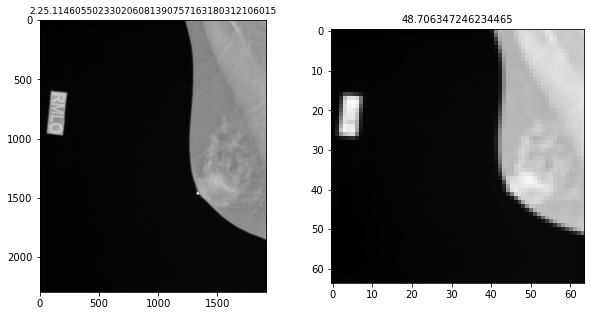

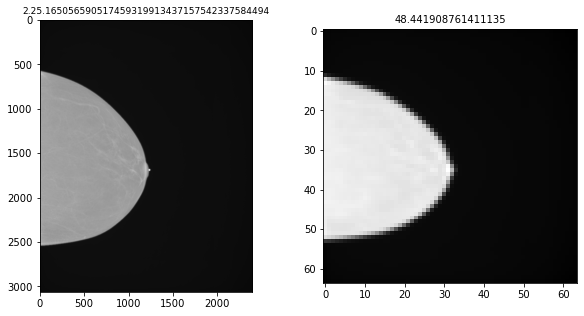

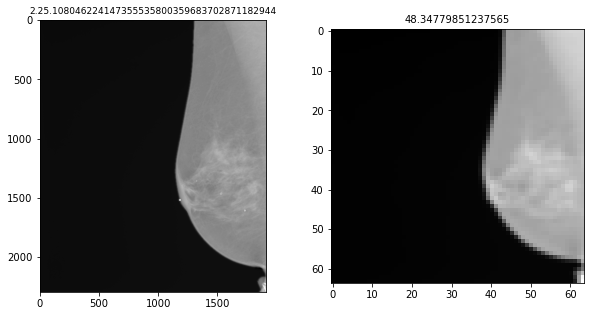

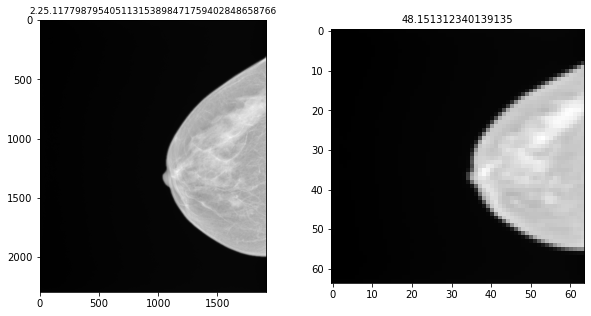

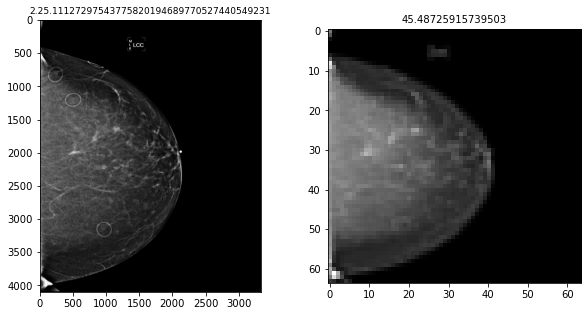

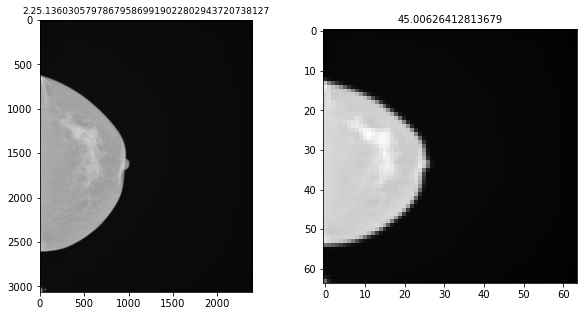

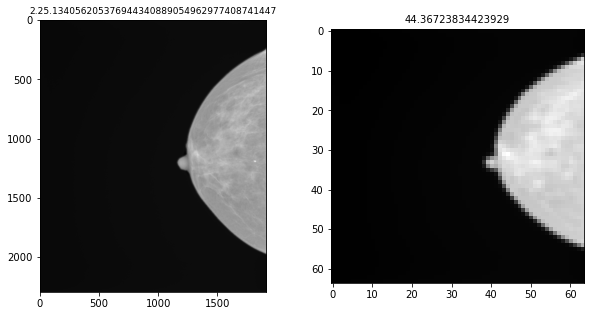

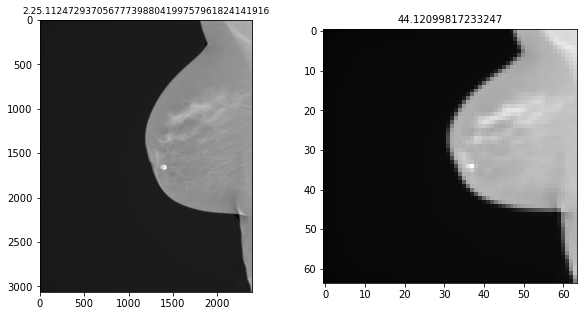

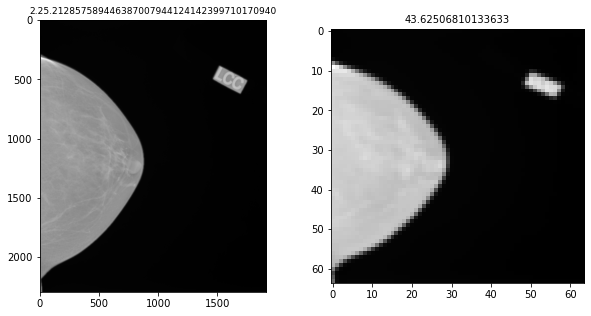

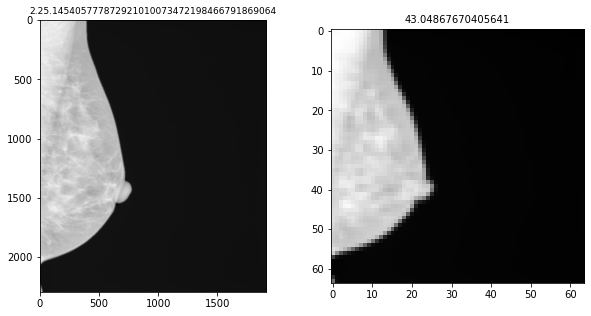

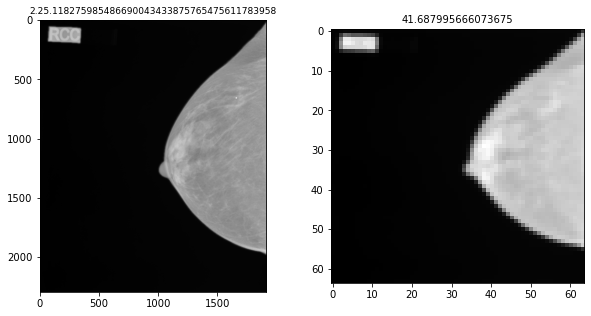

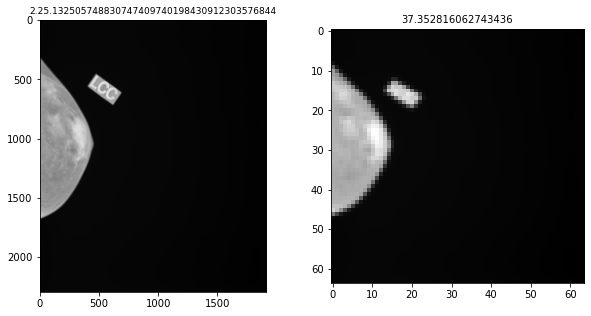

In [3]:
train_scoresX, train_labelsX = O.OutlierDetector.detect_outliers(downsampled_imgs, pyod_algorithm='VAE')
O.Features.view_image_and_features(imgs, ['downsample'], train_scores=[train_scoresX])